🔍 Task 2: Data Cleaning and Exploratory Data Analysis (EDA) on the Titanic Dataset
--------------------------------------
📌 Introduction
--------

In this task, we perform data cleaning and exploratory data analysis (EDA) on the widely-used Titanic dataset from Kaggle. This dataset contains detailed information about passengers aboard the Titanic, such as their age, gender, ticket class, fare, and survival status.

🎯 Objectives:
------------
Understand the structure and contents of the dataset.
Clean the data by handling missing or inconsistent values.
Explore relationships between different variables and the target variable (Survived).
Identify meaningful patterns and trends that can inform decision-making or predictive modeling.
This task reflects a typical assignment for a data analyst intern, where the focus is on uncovering insights through data preprocessing and visualization before applying machine learning techniques.

In [2]:
#AKASH_TASK_2
import pandas as pd

# Load Titanic dataset (CSV file from Kaggle or Seaborn)
df = pd.read_csv('/content/Titanic.csv')

# Basic overview
print(df.shape)
print(df.columns)
df.head()


(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Fill missing Age values with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Drop 'Cabin' column (too many missing values)
df = df.drop('Cabin', axis=1)

# Fill missing Embarked values with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [5]:
# Create a new column: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Convert 'Sex' and 'Embarked' to numeric for analysis
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [6]:
survival_rate = df['Survived'].value_counts(normalize=True)
print(survival_rate)


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


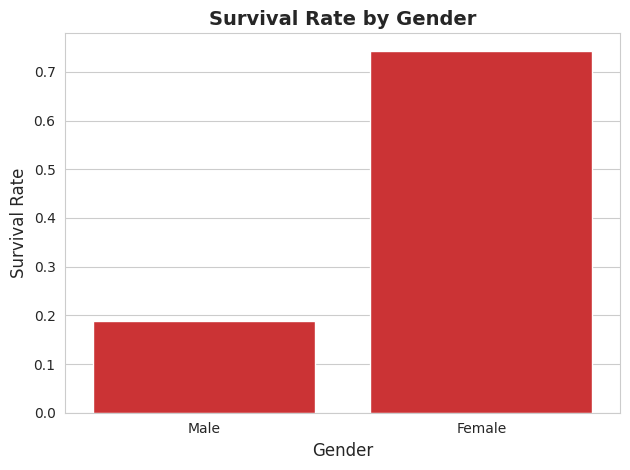

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a professional style
sns.set_style("whitegrid")
sns.set_palette("Set1")

# Create the bar plot
sns.barplot(x='Sex', y='Survived', data=df,errorbar=None)

# Add titles and labels
plt.title('Survival Rate by Gender', fontsize=14, weight='bold')
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.xticks([0, 1], ['Male', 'Female'])


plt.tight_layout()
plt.show()

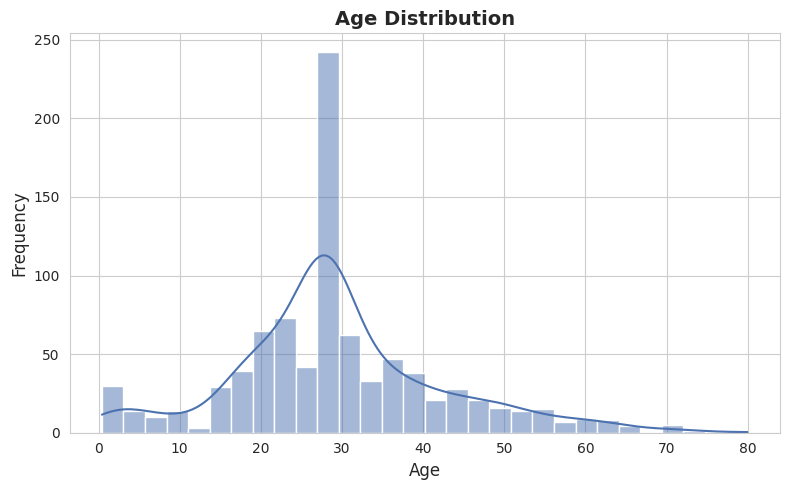

In [8]:
sns.set_style("whitegrid")
sns.set_palette("Purples")

# Create the histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True, color='#4C72B0')

# Title and labels
plt.title('Age Distribution', fontsize=14, weight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Clean layout
plt.tight_layout()
plt.show()


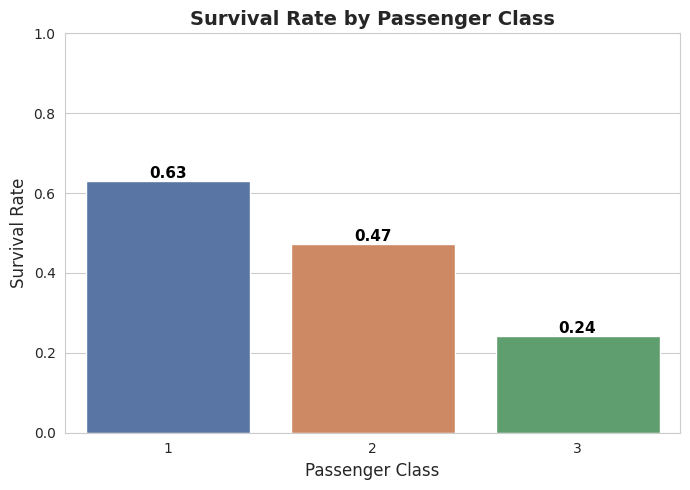

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set_style("whitegrid")

# Create the bar plot with proportions
plt.figure(figsize=(7, 5))
ax = sns.barplot(
    x='Pclass',
    y='Survived',
    hue='Pclass',
    data=df,
    estimator=lambda x: sum(x)/len(x),  # Calculate survival rate
    errorbar=None,
    palette='deep',
    legend=False
)

# Normalize the y-axis to show proportions
ax.set_ylim(0, 1)

# Add title and labels
plt.title('Survival Rate by Passenger Class', fontsize=14, weight='bold')
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Annotate survival rate on top of bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=11,
        color='black',
        weight='bold'
    )

plt.tight_layout()
plt.show()


In [10]:
# Map numeric values to port labels
df['Embarked'] = df['Embarked'].map({0: 'S', 1: 'C', 2: 'Q'})



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Custom color palette
palette = {'S': '#1f77b4', 'C': '#2ca02c', 'Q': '#ff7f0e'}

plt.figure(figsize=(7, 5))
ax = sns.barplot(
    x='Embarked',
    y='Survived',
    hue='Embarked',
    data=df,
    estimator=lambda x: sum(x)/len(x),
    errorbar=None,
    palette=palette,
    legend=False
)

ax.set_ylim(0, 1)
plt.title('Survival Rate by Embarkation Port', fontsize=14, weight='bold')
plt.xlabel('Embarkation Port', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)

# Annotate percentages
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=11, weight='bold'
    )

plt.tight_layout()
plt.show()



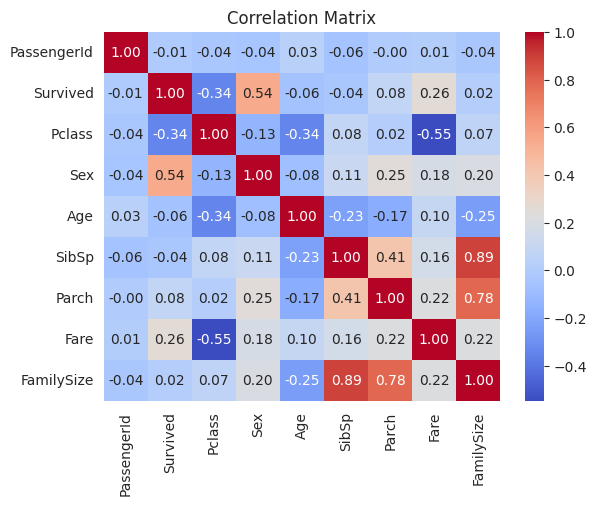

In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()